In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip3 install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 663.1 MB 1.6 kB/s 
     |████████████████████████████████| 8.8 MB 16.8 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.0+cu102
    Uninstalling torchvision-0.10.0+cu102:
      Successfully uninstalled torchvision-0.10.0+cu102
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.2.0+cu92 which is incompatible.


In [ ]:
!pip install Cython

In [ ]:
!pip install SpeechRecognition

     |████████████████████████████████| 32.8 MB 60 kB/s 


In [ ]:
!pip install jiwer

     |████████████████████████████████| 50 kB 3.8 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149860 sha256=c48e45f8e16a3fe58a68abf4c90c3b85da3f684b786ab2481a2d4c01595f1af0
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein


In [ ]:
%cd /content/gdrive/MyDrive/Colab\ Notebooks/Project/glow-tts

/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts


In [ ]:
!pip install -q Unidecode

     |████████████████████████████████| 241 kB 7.5 MB/s 


In [ ]:
!pip install -v --no-cache-dir --global-option="--cpp_ext" --global-option="--cuda_ext" ./apex

/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py:232: UserWarning: Disabling all use of wheels due to the use of --build-option / --global-option / --install-option.
  cmdoptions.check_install_build_global(options)
Using pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)
Value for scheme.platlib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.purelib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.headers does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m/UNKNOWN
Value for scheme.scripts does not match. Please report this to <https://github.com/pypa/p

In [ ]:
%cd /content/gdrive/MyDrive/Colab\ Notebooks/Project/glow-tts

/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts


In [ ]:
del model

NameError: ignored

In [ ]:
del model2

## Model training

In [ ]:
import time

%cd /content/gdrive/MyDrive/Colab\ Notebooks/Project/glow-tts
start_time = time.time()
!sh train_ddi.sh configs/base.json base
print("Time taken to complete the process in seconds - ",time.time() - start_time)

/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts
INFO:base:{'train': {'use_cuda': True, 'log_interval': 20, 'seed': 1234, 'epochs': 50, 'learning_rate': 1.0, 'betas': [0.9, 0.98], 'eps': 1e-09, 'warmup_steps': 2000, 'scheduler': 'noam', 'batch_size': 8, 'ddi': True, 'fp16_run': True}, 'data': {'load_mel_from_disk': False, 'training_files': 'filelists/ljs_audio_text_train_filelist.txt', 'validation_files': 'filelists/ljs_audio_text_val_filelist.txt', 'test_files': 'filelists/ljs_audio_text_test_filelist.txt', 'text_cleaners': ['english_cleaners'], 'max_wav_value': 32768.0, 'sampling_rate': 22050, 'filter_length': 1024, 'hop_length': 256, 'win_length': 1024, 'n_mel_channels': 80, 'mel_fmin': 0.0, 'mel_fmax': 8000.0, 'add_noise': True, 'cmudict_path': 'data/cmu_dictionary'}, 'model': {'hidden_channels': 192, 'filter_channels': 384, 'filter_channels_dp': 128, 'kernel_size': 3, 'p_dropout': 0.1, 'n_blocks_dec': 8, 'n_layers_enc': 4, 'n_heads': 8, 'mask_heads': [[], [], [], []], 'mas

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
del model2

NameError: ignored

In [ ]:
del model

NameError: ignored

## Loss calculation Module: 
### Generate the mel spectrogram based on trained model and measure the loss based on maximum likelihood estimation.

In [ ]:
%cd /content/gdrive/MyDrive/Colab\ Notebooks/Project/glow-tts
import os
import torch
%matplotlib inline
import matplotlib.pyplot as plt
import IPython.display as ipd

import librosa
import numpy as np
import os
import glob
import json

from text import text_to_sequence, cmudict
from text.symbols import symbols
import commons
import attentions
import modules
import models
import utils

torch.cuda.empty_cache()

def infer(filelist, model):

  filepath = '/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/filelists/' + filelist
  #print("filepath: ",filepath)
  mel_filepath = '/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/hifi-gan/test_mel_files/'
  FI = open(filepath, 'r')
  i = 0
  loss = 0.
  for line in FI:
    i += 1
    melfile = mel_filepath+str(i)+".npy"
    #print("melfile: ",melfile)
    #print(i,line.split('|')[1])
    tst_stn = line.split('|')[1]
    if getattr(hps.data, "add_blank", False):
      text_norm = text_to_sequence(tst_stn.strip(), ['english_cleaners'], cmu_dict)
      text_norm = commons.intersperse(text_norm, len(symbols))
    else: # If not using "add_blank" option during training, adding spaces at the beginning and the end of utterance improves quality
      tst_stn = " " + tst_stn.strip() + " "
      text_norm = text_to_sequence(tst_stn.strip(), ['english_cleaners'], cmu_dict)
    sequence = np.array(text_norm)[None, :]
    #print("".join([symbols[c] if c < len(symbols) else "<BNK>" for c in sequence[0]]))
    x_tst = torch.autograd.Variable(torch.from_numpy(sequence)).cuda().long()
    x_tst_lengths = torch.tensor([x_tst.shape[1]]).cuda()
    with torch.no_grad():
      noise_scale = .667
      length_scale = 1.0
      #(y_gen_tst, *_), *_, (attn_gen, *_) = modelnew(x_tst, x_tst_lengths, gen=True, noise_scale=noise_scale, length_scale=length_scale)
      (y_gen_tst, z_m, z_logs, logdet, z_mask), (x_m, x_logs, x_mask, l_head_wt, l_qry_wt), (attn_gen, logw, logw_) = model(x_tst, x_tst_lengths, gen=True, noise_scale=noise_scale, length_scale=length_scale)
      
      y_length = torch.tensor(y_gen_tst.size(2)).unsqueeze(0).clone().detach()
      #print("y_length: ",y_length)
      (z, z_m, z_logs, logdet, z_mask), (x_m, x_logs, x_mask, l_head_wt, l_qry_wt), (attn, logw, logw_) = model(x_tst, x_tst_lengths, y_gen_tst.cuda(), y_length.cuda(), gen=False)
      
      #print("y_gen_tst: ",y_gen_tst.size())
      l_mle = commons.mle_loss(y_gen_tst, z_m, z_logs, logdet, z_mask)
      l_length = commons.duration_loss(logw, logw_, x_tst_lengths)
      total_loss = l_mle + l_length
      loss += total_loss
    
    #np.save(melfile, y_gen_tst.cpu().detach().numpy())

  #print("Avg. Loss: ",loss/i)
  FI.close()
  avg_loss = loss/i
  avg_loss = np.round(avg_loss.cpu(),2)
  print(avg_loss)
  return avg_loss

/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts


In [ ]:
del model

In [ ]:
del model2

## Experiment 1

In [ ]:
import json
import numpy as np

hps = utils.get_hparams_from_file("/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/configs/base.json")
checkpoint_path = "/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/logs/base/G_20.pth"

model2 = models.FlowGenerator(
    len(symbols) + getattr(hps.data, "add_blank", False),
    out_channels=hps.data.n_mel_channels,
    **hps.model).to("cuda")

utils.load_checkpoint(checkpoint_path, model2)
model2.decoder.store_inverse() # do not calcuate jacobians for fast decoding
_ = model2.eval()

cmu_dict = cmudict.CMUDict("/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/" + hps.data.cmudict_path)

filelist = 'ljs_audio_text_test_filelist.txt'
model = model2
loss = infer(filelist, model)
#del model

loss_arr = np.zeros((4,8))

for i in range(4):
  for j in range(8):
    del model2
    del model
    with open("/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/configs/base.json", "r") as jsonFile:
      data = json.load(jsonFile)
      #print(data["model"]["mask_heads"])
    if i == 1:
      data["model"]["mask_heads"][i-1] = []
    if i == 2:
      data["model"]["mask_heads"][i-1] = []
      data["model"]["mask_heads"][i-2] = []
    if i == 3:
      data["model"]["mask_heads"][i-1] = []
      data["model"]["mask_heads"][i-2] = []
      data["model"]["mask_heads"][i-3] = []
    
    data["model"]["mask_heads"][i] = [j]

    with open("/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/configs/base.json", "w") as jsonFile:
      json.dump(data, jsonFile)

    hps = utils.get_hparams_from_file("/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/configs/base.json")
    checkpoint_path = "/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/logs/base_final_graph_20/G_20.pth"

    model2 = models.FlowGenerator(
        len(symbols) + getattr(hps.data, "add_blank", False),
        out_channels=hps.data.n_mel_channels,
        **hps.model).to("cuda")

    utils.load_checkpoint(checkpoint_path, model2)
    model2.decoder.store_inverse() # do not calcuate jacobians for fast decoding
    _ = model2.eval()

    cmu_dict = cmudict.CMUDict("/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/" + hps.data.cmudict_path)

    filelist = 'ljs_audio_text_test_filelist.txt'
    model = model2
    loss_arr[i][j] = ((loss - infer(filelist, model)) / loss) * 100
print("Base Model Loss: ",loss)
print(loss_arr)

INFO:root:Loaded checkpoint '/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/logs/base/G_20.pth' (iteration 20)
tensor(12.6700)
INFO:root:Loaded checkpoint '/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/logs/base/G_20.pth' (iteration 20)
tensor(12.7000)
INFO:root:Loaded checkpoint '/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/logs/base/G_20.pth' (iteration 20)
tensor(12.5900)
INFO:root:Loaded checkpoint '/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/logs/base/G_20.pth' (iteration 20)
tensor(12.6300)
INFO:root:Loaded checkpoint '/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/logs/base/G_20.pth' (iteration 20)
tensor(12.6100)
INFO:root:Loaded checkpoint '/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/logs/base/G_20.pth' (iteration 20)
tensor(12.6200)
INFO:root:Loaded checkpoint '/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/logs/base/G_20.pth' (iteration 20)
tensor(12.6400)
INFO:root:Loaded checkpoint '/content/gdr

In [ ]:
del model

In [ ]:
del model2

## Experiment 2

In [ ]:
import json
import numpy as np

hps = utils.get_hparams_from_file("/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/configs/base.json")
checkpoint_path = "/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/logs/base/G_20.pth"

model2 = models.FlowGenerator(
    len(symbols) + getattr(hps.data, "add_blank", False),
    out_channels=hps.data.n_mel_channels,
    **hps.model).to("cuda")

utils.load_checkpoint(checkpoint_path, model2)
model2.decoder.store_inverse() # do not calcuate jacobians for fast decoding
_ = model2.eval()

cmu_dict = cmudict.CMUDict("/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/" + hps.data.cmudict_path)

filelist = 'ljs_audio_text_test_filelist.txt'
model = model2
loss = infer(filelist, model)
#del model

loss_arr = np.zeros((4,8))

for i in range(4):
  for j in range(8):
    del model2
    del model
    lst = []
    with open("/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/configs/base.json", "r") as jsonFile:
      data = json.load(jsonFile)
      print(data["model"]["mask_heads"])
    if i == 1:
      data["model"]["mask_heads"][i-1] = []
    if i == 2:
      data["model"]["mask_heads"][i-1] = []
      data["model"]["mask_heads"][i-2] = []
    if i == 3:
      data["model"]["mask_heads"][i-1] = []
      data["model"]["mask_heads"][i-2] = []
      data["model"]["mask_heads"][i-3] = []
    
    for item in range(0,8):
      if item != j:
        lst.append(item)
    data["model"]["mask_heads"][i] = lst

    with open("/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/configs/base.json", "w") as jsonFile:
      json.dump(data, jsonFile)

    hps = utils.get_hparams_from_file("/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/configs/base.json")
    checkpoint_path = "/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/logs/base_final_graph_20/G_20.pth"

    model2 = models.FlowGenerator(
        len(symbols) + getattr(hps.data, "add_blank", False),
        out_channels=hps.data.n_mel_channels,
        **hps.model).to("cuda")

    utils.load_checkpoint(checkpoint_path, model2)
    model2.decoder.store_inverse() # do not calcuate jacobians for fast decoding
    _ = model2.eval()

    cmu_dict = cmudict.CMUDict("/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/" + hps.data.cmudict_path)

    filelist = 'ljs_audio_text_test_filelist.txt'
    model = model2
    loss_arr[i][j] = ((loss - infer(filelist, model)) / loss) * 100
print("Base Model Loss: ",loss)
print(loss_arr)

INFO:root:Loaded checkpoint '/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/logs/base/G_20.pth' (iteration 20)
tensor(12.6100)
[[], [], [], []]
INFO:root:Loaded checkpoint '/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/logs/base/G_20.pth' (iteration 20)
tensor(12.6200)
[[1, 2, 3, 4, 5, 6, 7], [], [], []]
INFO:root:Loaded checkpoint '/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/logs/base/G_20.pth' (iteration 20)
tensor(12.7100)
[[0, 2, 3, 4, 5, 6, 7], [], [], []]
INFO:root:Loaded checkpoint '/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/logs/base/G_20.pth' (iteration 20)
tensor(12.6500)
[[0, 1, 3, 4, 5, 6, 7], [], [], []]
INFO:root:Loaded checkpoint '/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/logs/base/G_20.pth' (iteration 20)
tensor(12.7500)
[[0, 1, 2, 4, 5, 6, 7], [], [], []]
INFO:root:Loaded checkpoint '/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/logs/base/G_20.pth' (iteration 20)
tensor(12.6300)
[[0, 1, 2, 3, 5, 

In [ ]:
del model

In [ ]:
del model2

In [ ]:
torch.cuda.empty_cache()

## Experiment 3
#### This array is manually created from the output of model training. arr4 is generated using four least weighted attention heads in a group. arr3 is generated using three least weighted attention heads in a group.

INFO:root:Loaded checkpoint '/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/logs/base/G_20.pth' (iteration 20)
tensor(12.6300)
tmpl:  tensor(12.6300)
tensor(12.6600)
tmpl:  tensor(12.6600)
tensor(12.6100)
tmpl:  tensor(12.6100)
tensor(12.6200)
tmpl:  tensor(12.6200)
tensor(12.6400)
tmpl:  tensor(12.6400)
tensor(12.5900)
tmpl:  tensor(12.5900)
tensor(12.6300)
tmpl:  tensor(12.6300)
tensor(12.6200)
tmpl:  tensor(12.6200)
tensor(12.6600)
tmpl:  tensor(12.6600)
tensor(12.6500)
tmpl:  tensor(12.6500)
Baseline Loss:  tensor(12.6300)
[[7, 3, 4], [4], [], []]
INFO:root:Loaded checkpoint '/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/logs/base/G_20.pth' (iteration 20)
tensor(12.7000)
loss_arr2:  [[12.63000011 12.69999981  0.          0.          0.          0.
   0.          0.          0.        ]]
[[7, 3, 4], [4, 7], [], [4, 1, 5]]
INFO:root:Loaded checkpoint '/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/logs/base/G_20.pth' (iteration 20)
tensor(12.6500)
loss_

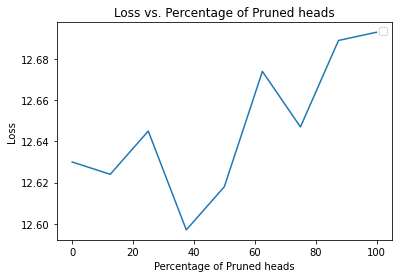

In [ ]:
arr2 = [ 7,  3,  4, 12, 15, 28, 25, 29, 17,  2, 16, 22, 31, 30, 21, 13, 19,  6, 18,  9,  5, 11, 26, 27,
 20, 10, 24,  1,  8, 23, 14,  0]
arr3 = [[7,  3,  4],[12, 15, 28],[25, 29, 17],[2, 16, 22],[31, 30, 21],[13, 19,  6],[18,  9,  5],[11, 26, 27],[20, 10, 24],[1,  8, 23],[14,  0]]
arr4 = [[7,  3,  4, 12],[15, 28, 25, 29],[17,  2, 16, 22],[31, 30, 21, 13],[19,  6, 18,  9],[5, 11, 26, 27],[20, 10, 24,  1],[8, 23, 14,  0]]
import json
import numpy as np

hps = utils.get_hparams_from_file("/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/configs/base.json")
checkpoint_path = "/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/logs/base_final_graph_20/G_20.pth"

model2 = models.FlowGenerator(
    len(symbols) + getattr(hps.data, "add_blank", False),
    out_channels=hps.data.n_mel_channels,
    **hps.model).to("cuda")

utils.load_checkpoint(checkpoint_path, model2)
model2.decoder.store_inverse() # do not calcuate jacobians for fast decoding
_ = model2.eval()

cmu_dict = cmudict.CMUDict("/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/" + hps.data.cmudict_path)

filelist = 'ljs_audio_text_test_filelist.txt'
model = model2

#loss = infer(filelist, model)
loss = 0
for i in range(0,10):
  tmpl = infer(filelist, model)
  print("tmpl: ",tmpl)
  loss = loss + tmpl
loss = np.round(loss / 10,2)

print("Baseline Loss: ",loss)
#loss_arr2 = np.empty([1,12], dtype=float)
#loss_arr2 = np.empty([1,9], dtype=float)
loss_arr2 = np.zeros((1,9), dtype=float)
#print(loss_arr2.shape())
num = 0
loss_arr2[0, num] = loss.cpu()

del model2
del model

for i in range(0,10):
  num = 0

  for arr in arr4:

    with open("/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/configs/base.json", "r") as jsonFile:
      data = json.load(jsonFile)

      for idx in arr:
        i = idx // 8
        j = idx % 8
        data["model"]["mask_heads"][i].append(int(j))
      print(data["model"]["mask_heads"])

      with open("/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/configs/base.json", "w") as jsonFile:
        json.dump(data, jsonFile)

      hps = utils.get_hparams_from_file("/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/configs/base.json")
      checkpoint_path = "/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/logs/base/G_20.pth"

      model2 = models.FlowGenerator(
          len(symbols) + getattr(hps.data, "add_blank", False),
          out_channels=hps.data.n_mel_channels,
          **hps.model).to("cuda")

      utils.load_checkpoint(checkpoint_path, model2)
      model2.decoder.store_inverse() # do not calcuate jacobians for fast decoding
      _ = model2.eval()

      cmu_dict = cmudict.CMUDict("/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/" + hps.data.cmudict_path)

      filelist = 'ljs_audio_text_test_filelist.txt'
      model = model2
      #loss_arr[i][j] = loss - infer(filelist, model)
      num += 1
      #loss_arr2[0, num] = (loss - infer(filelist, model)).cpu()
      #loss_arr2[0, num] = infer(filelist, model).cpu()
      loss_arr2[0, num] += infer(filelist, model).cpu()
      print("loss_arr2: ",loss_arr2)
      del model2
      del model

  with open("/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/configs/base.json", "r") as jsonFile:
    data = json.load(jsonFile)
    data["model"]["mask_heads"][0] = []      
    data["model"]["mask_heads"][1] = []
    data["model"]["mask_heads"][2] = []
    data["model"]["mask_heads"][3] = []
    print(data["model"]["mask_heads"])

    with open("/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/configs/base.json", "w") as jsonFile:
      json.dump(data, jsonFile)  
 
loss_arr2[0][1:] = loss_arr2[0][1:] / 10
print(loss_arr2)
lst = np.empty(9, dtype=float)
lst[0] = 0
for i in range(2,10):
  lst[i-1] = np.round(((i-1)*4 / 32)*100,2)
print(lst)

fig = plt.figure()
plt.title("Loss vs. Percentage of Pruned heads")
plt.xlabel("Percentage of Pruned heads")
plt.ylabel("Loss")
#plt.plot(range(1,13),loss_arr2.flatten())
#plt.plot(range(1,10),loss_arr2.flatten())
plt.plot(lst,loss_arr2.flatten())
#plt.plot(range(1,hps.train.epochs + 1),loss_val,label='Validation')
plt.legend()
del lst

In [ ]:
del model

In [ ]:
del model2

## Execution time check

In [ ]:
%cd /content/gdrive/MyDrive/Colab\ Notebooks/Project/glow-tts
%matplotlib inline
import matplotlib.pyplot as plt
import IPython.display as ipd

import librosa
import numpy as np
import os
import glob
import json
import time

import torch
from text import text_to_sequence, cmudict
from text.symbols import symbols
import commons
import attentions
import modules
import models
import utils

#from apex import amp

# If you are using a provided pretrained model
hps = utils.get_hparams_from_file("./configs/base.json")
checkpoint_path = "/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/logs/base_50_all_head/G_50.pth" ## Change mask_heads in "glow-tts/configs/base.json" file to [[7, 3, 4, 2], [4, 7, 5], [1, 0, 6, 5], [4, 1, 5, 7, 6]] for optimized inference.

model2 = models.FlowGenerator(
    len(symbols) + getattr(hps.data, "add_blank", False),
    out_channels=hps.data.n_mel_channels,
    **hps.model).to("cuda")

utils.load_checkpoint(checkpoint_path, model2)
model2.decoder.store_inverse() # do not calcuate jacobians for fast decoding
_ = model2.eval()

cmu_dict = cmudict.CMUDict(hps.data.cmudict_path)

# %cd "/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/hifi-gan/generated_files_from_mel"
# !rm *.wav
# !ls *
# %cd "/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/hifi-gan/test_mel_files"
# ! rm *.npy
# !ls *

filelist = 'ljs_audio_text_test_filelist.txt'
model = model2
start_time = time.time()
loss1 = infer(filelist, model)
print("Time taken to compute loss of the model in %s seconds ---" % (time.time() - start_time))
print("Loss: ",loss1)
#!cd "/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/hifi-gan" && python inference_e2e.py --checkpoint_file "/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/hifi-gan/hifi.pth"
del model2
del model

/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.
INFO:root:Loaded checkpoint '/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/logs/base/G_50.pth' (iteration 50)
tensor(12.4600)
Time taken to compute loss of the model in 4.218181133270264 seconds ---
Loss:  tensor(12.4600)


In [ ]:
%cd "/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/hifi-gan/generated_files_from_mel"
!rm *.wav
!ls *
%cd "/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/hifi-gan/test_mel_files"
! rm *.npy
!ls *

/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/hifi-gan/generated_files_from_mel
ls: cannot access '*': No such file or directory
/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/hifi-gan/test_mel_files
ls: cannot access '*': No such file or directory


In [ ]:
del model

NameError: ignored

## .WAV file generation

In [ ]:
%cd /content/gdrive/MyDrive/Colab\ Notebooks/Project/glow-tts
%matplotlib inline
import matplotlib.pyplot as plt
import IPython.display as ipd

import librosa
import numpy as np
import os
import glob
import json
import time

import torch
from text import text_to_sequence, cmudict
from text.symbols import symbols
import commons
import attentions
import modules
import models
import utils

#from apex import amp

# If you are using a provided pretrained model
hps = utils.get_hparams_from_file("./configs/base.json")
checkpoint_path = "/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/logs/base_50_all_head/G_50.pth" ## Change mask_heads in "glow-tts/configs/base.json" file to [[7, 3, 4, 2], [4, 7, 5], [1, 0, 6, 5], [4, 1, 5, 7, 6]] for optimized inference.
#checkpoint_path = "/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/logs/base_final_opti/G_50.pth"

modelnew = models.FlowGenerator(
    len(symbols) + getattr(hps.data, "add_blank", False),
    out_channels=hps.data.n_mel_channels,
    **hps.model).to("cuda")

utils.load_checkpoint(checkpoint_path, modelnew)
modelnew.decoder.store_inverse() # do not calcuate jacobians for fast decoding
_ = modelnew.eval()

cmu_dict = cmudict.CMUDict(hps.data.cmudict_path)


FI = open('/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/filelists/ljs_audio_text_test_filelist.txt', 'r')
i = 0
for line in FI:
  i += 1
  newfl = "/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/hifi-gan/test_mel_files/"+str(i)+".npy"
  #print(i,line.split('|')[1])
  tst_stn = line.split('|')[1]
  if getattr(hps.data, "add_blank", False):
    text_norm = text_to_sequence(tst_stn.strip(), ['english_cleaners'], cmu_dict)
    text_norm = commons.intersperse(text_norm, len(symbols))
  else: # If not using "add_blank" option during training, adding spaces at the beginning and the end of utterance improves quality
    tst_stn = " " + tst_stn.strip() + " "
    text_norm = text_to_sequence(tst_stn.strip(), ['english_cleaners'], cmu_dict)
  sequence = np.array(text_norm)[None, :]
  #print("".join([symbols[c] if c < len(symbols) else "<BNK>" for c in sequence[0]]))
  x_tst = torch.autograd.Variable(torch.from_numpy(sequence)).cuda().long()
  x_tst_lengths = torch.tensor([x_tst.shape[1]]).cuda()
  with torch.no_grad():
    noise_scale = .667
    length_scale = 1.0
    (y_gen_tst, *_), *_, (attn_gen, *_) = modelnew(x_tst, x_tst_lengths, gen=True, noise_scale=noise_scale, length_scale=length_scale)

  # save mel-frames
  if not os.path.exists('/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/hifi-gan/test_mel_files'):
    os.makedirs('/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/hifi-gan/test_mel_files')
  np.save(newfl, y_gen_tst.cpu().detach().numpy())
  #os.chdir('hifi-gan')
FI.close()

!cd "/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/hifi-gan" && python inference_e2e.py --checkpoint_file "/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/hifi-gan/hifi.pth"

del modelnew

/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.
INFO:root:Loaded checkpoint '/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/logs/base_50_all_head/G_50.pth' (iteration 50)
Initializing Inference Process..
Namespace(checkpoint_file='/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/hifi-gan/hifi.pth', input_mels_dir='test_mel_files', output_dir='generated_files_from_mel')
Loading '/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/hifi-gan/hifi.pth'
Complete.
Removing weight norm...
generated_files_from_mel/1_generated_e2e.wav
generated_files_from_mel/2_generated_e2e.wav
generated_files_from_mel/3_generated_e2e.wav
generated_files_from_mel/4_generated_e2e.wav
generated_files_from_mel/5_generated_e2e.wav
generated_files_from_mel/6_generated_e2e.wav
generated_files_from_mel/7_generated_e2e.wav
generated_files_from_mel/8_generated_e2e.wav
generated_files_from_mel/9

In [ ]:
del model

NameError: ignored

In [ ]:
del modelnew

NameError: ignored

## Word Error Rate calculation

In [ ]:
%cd /content/gdrive/MyDrive/Colab\ Notebooks/Project/glow-tts
import speech_recognition as sr
import jiwer
from jiwer import wer

def wer(filelist):
  filepath = '/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/filelists/'+filelist
  wav_filepath = '/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/hifi-gan/generated_files_from_mel/'
  
  transformation = jiwer.Compose([
      jiwer.ToLowerCase(),
      jiwer.RemoveMultipleSpaces(),
      jiwer.RemovePunctuation(),
      jiwer.Strip(),
      #jiwer.RemoveWhiteSpace(replace_by_space=False),
      #jiwer.SentencesToListOfWords(word_delimiter=" "),
      jiwer.RemoveEmptyStrings()
  ])

  FI = open(filepath, 'r')
  i = 0
  r = sr.Recognizer()
  total_err = 0
  for line in FI:
    i += 1
    audiofl = wav_filepath+str(i)+"_generated_e2e.wav"
    print(audiofl)
    #print(i,line.split('|')[1])
    #glow = sr.AudioFile('/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/hifi-gan/generated_files_from_mel/sample_generated_e2e.wav')
    glow = sr.AudioFile(audiofl)
    with glow as source:
      audio = r.record(glow)
    #r.recognize_google(audio)
    ground_truth = line.split('|')[1]
    print("ground_truth: ",ground_truth)
    try:
      hypothesis = r.recognize_google(audio,language='en-GB')
    except sr.UnknownValueError:
      hypothesis = "Unrecognized"
    #hypothesis = r.recognize_google(audio,language='en-GB')
    print("hypothesis: ",hypothesis)
    error = jiwer.wer(
        ground_truth, 
        hypothesis, 
        truth_transform=transformation, 
        hypothesis_transform=transformation
    )
    total_err += error
  print("total_err: ",total_err)
  print("i: ",i)
  avg_err = total_err / i
  #print("avg_wer: ",avg_err)
  FI.close()
  return avg_err

/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts


In [ ]:
filelist = 'ljs_audio_text_test_filelist.txt'
err = wer(filelist)
print("err: ",err)

/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/hifi-gan/generated_files_from_mel/1_generated_e2e.wav
ground_truth:  Then there was the campaign.

hypothesis:  and there was the campaign
/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/hifi-gan/generated_files_from_mel/2_generated_e2e.wav
ground_truth:  He was manifestly distressed by my coming.

hypothesis:  he was manifestly distressed by my phone
/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/hifi-gan/generated_files_from_mel/3_generated_e2e.wav
ground_truth:  Not a wheel moved in his empire.

hypothesis:  not over you moved in his Empire
/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/hifi-gan/generated_files_from_mel/4_generated_e2e.wav
ground_truth:  The reorganization of these countries took the form of revolution.

hypothesis:  ization of these countries took the form of revolution
/content/gdrive/MyDrive/Colab Notebooks/Project/glow-tts/hifi-gan/generated_files_from_mel/5_generated_e2e.wav
g

In [ ]:
%tb

anything I want to get familiar
test_200_generated_e2e.wav - tomorrow is holiday and I want to take complete grass
test_last_h2_200_generated_e2e.wav - tomorrow is probably and I wanted a complete rest

*   List item
*   List item

